# Objectives 

When you have done the exercises for this week and went through the related
reading material, you should

• be able to formulate the basic least squares regression models (regularized, proba-
bilistic, etc.) and derive its optimal estimators,

• comprehend the idea and use of polynomial, transformed, and kernelized regression,

• be capable of identifying the trade-off between bias and variance in regression and
classification and measure it,

• be able to formulate L1 regularization and understand its feature selection abilities,

• understand how Fisher’s linear discriminant is formulated in terms of standard
linear regression,

• appreciate the general formulation of a learning problem in terms of hypotheses,
loss, and regularizer,

• have a basic understanding of kernel regression and how it differs from kernelized
regression.


# 3.1 Linear Least Squares without and with Intercept
## Exercise 3.1 
Consider standard linear regression with the squared loss as the performance
measure:
$\sum_{i = 1} ^ N
(x_i^T w − y_i)^2 = \lVert X_w − Y \rVert $                

Note that in the expression above there is some confusing notation going on. The
(feature) vector $x_i ∈ R^d$ is a column vector, while all features per object in $X \in R^{N*d}$
are in rows. Y is an N -vector with all corresponding outputs.

The aim is to minimizing this sum of squared residuals between the linearly predicted
and actual output over $w ∈ R^d$.

(a) Assume that $(X^TX)^{−1}$ exists. Show that $(X^TX)^{−1}X^TY$ gives a least squares
solution to the above problem, i.e., it minimizes $\lVert Xw − Y \rVert$.

(b) Given that $(X^TX)^{−1}$ exists, what does that tell us about the data? More specifically, what limitation on the number of observations does this imply, what does invert-
ibility say about the dimensionality of the (affine) subspace our data is in, and what
difference does the presence or absence of the origin in this subspace make? To what
extent are these limitations enough to guarantee invertibility?

Let us now allow for an intercept (or bias term), i.e., we also model a constant offset in the
regression function. We do this by the trick of adding a column of ones to the matrix X. Let
Z refer to this new matrix.

Consider standard linear regression (with intercept) with the squared loss as the performance
measure, $\lVert Zw − Y \rVert$ , which we want to minimize for w.


## Answer a:
<font color='red'>
$ \lVert Xw - Y \rVert ^2 = (Xw - Y)^T(Xw - Y)= [(Xw)^T - Y^T](Xw - Y)= (w^TX^T - Y^T)(Xw - Y)= (w^TX^TXw - Y^TXw -w^TX^TY +Y^TY)$

$Y^TXw = w^TX^TY$
    
$F = w^TX^TXw - 2Y^TXW + Y^TY$

$ dF = 2 X^TXw - 2Y^TX$

$w = (X^TX)^{-1}Y^TX$
</font>


# Ex 3.5 

In [1]:
import prtools as pr
import numpy as np
import matplotlib.pyplot as plt
# import random

In [3]:
x_test = np.random.uniform(0, 1, size = 1000)
x_test = x_test.reshape(-1, 1)

x_train = np.random.uniform(0, 1, size = 100)
x_train = x_train.reshape(-1, 1)

y_train = x_train + np.random.normal(0, 1, size = 100).reshape(-1, 1)
# print(y_train)
# print(y_train - x_train)
y_train = y_train.reshape(-1, 1)


y_test = x_test + np.random.normal(0, 1, size = 1000).reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

x = pr.gendatr(x_train, y_train)

x_t = pr.gendatr(x_test, y_test)
# data2 = pr.gendatr(1000)  # why can not be used???
# x_test.shape 
# data2.shape
# x_train = np.array([1, 2])
# x_train.shape

In [4]:
help(pr.ridger)

Help on function ridger in module prtools.prtools:

ridger(task=None, x=None, w=None)
    Ridge regression



1.0256522039921019

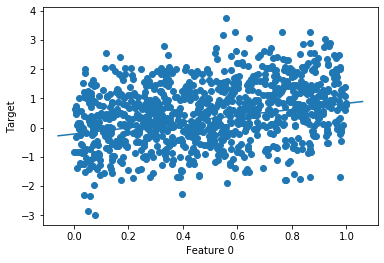

In [5]:
w = pr.ridger(x, 1)
pr.scatterr(x_t)
pr.plotr(w)
b = w.eval(x_t)
e = pr.testr(b)
e

[1.0216112761921075, 1.0216465615894796, 1.022000673917161, 1.0256522039921019, 1.0645610291469831, 1.0645610291469831, 1.2823774119843392]


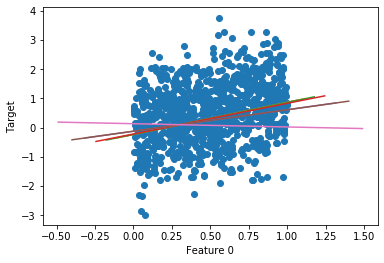

In [6]:
pr.scatterr(x_t)
e = []
lamda = np.array([0.001, 0.01, 0.1, 1, 10, 10, 1000])
for i in range(len(lamda)):
    w = pr.ridger(x, lamda[i])
    pr.plotr(w)
    b = w.eval(x_t)
    e.append(pr.testr(b))
print(e)


0.07994048479071834


0.001022000673917161

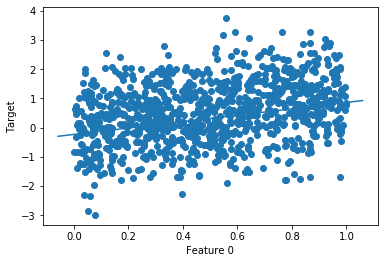

In [7]:
w = pr.ridger(x, 0.1)
pr.scatterr(x_t)
pr.plotr(w)
b = w.eval(x_t)
e = pr.testr(b)
print(np.var(x_test))
e/1000

0.07994048479071834


0.0010216073570232544

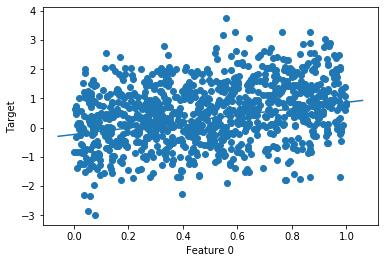

In [8]:
w = pr.ridger(x, 0)
pr.scatterr(x_t)
pr.plotr(w)
b = w.eval(x_t)
e = pr.testr(b)
print(np.var(x_test))
e/1000

# Ex 3.7

In [9]:
b = pr.gendatb(10)
b.shape
b = b[:10,:]
b.shape

(10, 2)

0.2


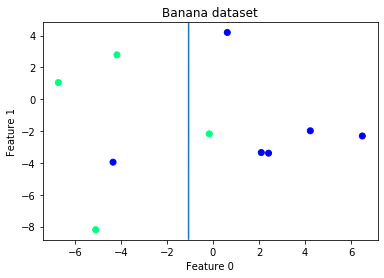

In [10]:
lda = pr.ldc(b)
#nmc = pr.nmc(b)
pr.scatterd(b)
a = lda.eval(b)
e = pr.testc(a)
print(e)
pr.plotc(lda)
# pr.plotc(nmc)

# Ex 3.9

In [2]:
x = np.random.normal(0, 1, 20)
x = x.reshape(-1, 1)
epsilon = np.random.normal(20)
y = x + epsilon/5
x_train = pr.prdataset(x, y)
# print(x)
# print(y)
pr.scatterd(x_train)

NameError: name 'np' is not defined

# 3.5 The Lasso
Another way of regularizing that is popular is through an L1 norm instead of the L2 norm.
This leads to the so-called least absolute shrinkage and selection operator or LASSO for short.
What is nice about the LASSO is that it often also results in a selection of features (feature
selection is also implemented through some other approaches as we will see later). That is, it
automatically leads to a reduction of the number of features that the final regressor depends
on. Here, we investigate that behavior a bit.


## Ex 3.11 

Consider a 2D regression problem where x ∈ R2 is standard normally distributed, while y = x1 + $\epsilon$/5, where ε is also from a standard normal distribution.
<font color='orange'>
    Dont understand
<font>


### (a) 
Take a few samples form the above problem, say 20 or so. Visualize the shape of
the objective function for regression with no intercept and standard L2 regularization
for different values of λ. Inspect/determine visually for which value of λ at least one of
the entries of the minimizing w becomes 0. Does any of the two entries of the optimum
ever become zero really?


## Answer a:
<font color='red'>
 No, none of the entries ever become zero really.  The probability that this happens is 0.  
 In the limit, for $\lamda$ larer and larger,w should of course shrink to 0 however
</font>

## (b) 

As in 3.11(a), take the same number of samples form the above regression problem.
Visualize the shape of the objective function for different values of λ but now use L1
regularization. What shape does the objective take on when λ = 0 and when λ is very,
very large? Inspect/determine visually around which value for λ one of the entries of
the optimal w becomes 0. Should it really become zero for some λ in this setting?


## Answer b:
<font color='red'>
In this setting there will be a  finite $lamda$ for which at least on of the entries (most often the second of course!)  
becomes zero.  For an even larger $lamda$, also the other entry will become 0.
</font>

# 3.6 Polynomial Regression and Other Feature Transformations
The function linearr allows one to perform polynomial regression. Polynomial regression fits
a polynomial of some maximal degree to the data in a least squares sense. Even though this
results in a nonlinear function in x, the problem may still be referred to as linear regression
as the regression function is, in fact, linear in the unknown parameters w estimated from the
data. Enough with the confusion, let’s do some experiments!

## Exercise 3.12 

Using gendatr or prdataset, generate data where the inputs x are drawn
uniformly from the interval [0, 1] and the corresponding outputs y are obtained by
squaring this value and adding Gaussian noise to the inputs: y = x2 + ε with ε a
random sample from the standard normal distribution.


### (a) 
Study the behavior of polynomials of degree 0 to 3 for different training set sizes
(e.g. 4, 40, and 400 samples?). You may want to have a look at the data and the fitted
polynomial models. You can also estimate the squared error using a somewhat large
test set.

0.9955352827882612

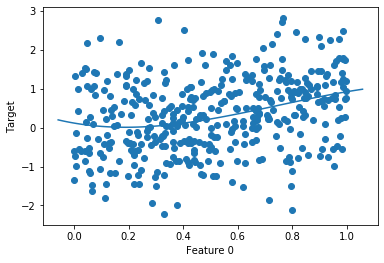

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import prtools as pr


x = np.random.uniform(0, 1, 400)
# help(np.random.uniform)
x = x.reshape(-1, 1)
y = x**2 + np.random.normal(0, 1, 400).reshape(-1, 1)
# help(np.random.normal)
# plt.scatter(x, y)
# print(x.shape, y.shape)
a = pr.gendatr(x, y)
w = pr.linearr(a, 3)
pr.scatterr(a)
pr.plotr(w)

x_test = np.random.uniform(0, 1, 400)
x_test = x.reshape(-1, 1)
y_test = x_test**2 + np.random.normal(0, 1, 400).reshape(-1, 1)
a_test = pr.gendatr(x_test, y_test)
b = w.eval(a_test)
e = pr.testr(b)
e

### (b) 

Estimate the bias and the variance of the prediction using the four different polynomial regressors and a couple of different training set sizes. Compare these outcomes,
both across degree and across training set sizes. How do the bias and variance change?
Did you expect this in the light of the the bias-variance tradeoff?



<font color = 'red' >
Of course you expected this behavior!  When going up in degree,  the variance typically in-creases, while the bias decreases.  When moving to more and more data, the bias remains the same(more or less?), while the variance gets lower and lower
<font>

## Ex 3.14
 Assume you would like to predict the temperature in the Netherlands (out-
put) on the basis of the specific day of the year, encoded as x1 th month in year and x2 th
day in month (input). What kind of transformation(s) of this initial 2D input data would
you use in order to get “linear” regression to work on this data?

My quick-and-dirty solution would be two-fold.  

First, the encoding into months and days is not nice and I would like a more linear kind of time-scale.  
So, I propose to  first transform that into a1D representationtby something liket= 30(x11) + (x21).  This makestfairly linear overone year with a minimum of 0 and a maximum of 360.  Now, I would expect some periodicity inthe signal.  So, I actually want to move away from the lineart.  I would expect one max and onemin temperture in the year, so a  rst order approximation with a (co)sinus should be a good  rst
attempt.  Based on this, I would use as  nal 2D input:  (sin(t);cos(t))

# 3.10 Hypothesis Classes and (Surrogate) Losses

In an attempt to develop a general approach to machine learning, a learning problem may
be defined in somewhat abstract terms as consisting out of four components. Next to the
training data sets D, we have a hypothesis class H, which is the set of all possible models
that are considered, a loss, which is a function that tells us how well a hypothesis h ∈ H fits
the data D, and a regularization term. The assumption then is that, what we are looking for,
is the hypothesis from H that minimizes the loss on the training data.

# Ex 3.6

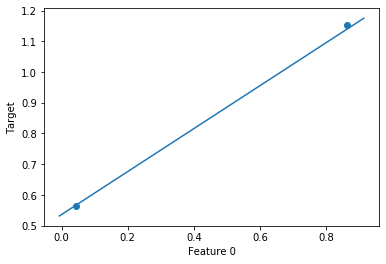

In [25]:
import prtools as pr
import numpy as np

x_1 = np.random.uniform(0, 1, 2).reshape(-1, 1)
# print(x_1.shape)
y_1 = x_1 + np.random.normal(0, 1, 2).reshape(-1, 1)
train_data = pr.gendatr(x_1, y_1)
# test_data = pr.gendatr(10000)
# print(train_data)

x_2 = np.random.uniform(0, 1, 1000).reshape(-1, 1)
# print(x_1.shape)
y_2 = x_2 + np.random.normal(0, 1, 1000).reshape(-1, 1)
test_data = pr.gendatr(x_2, y_2)

cla = pr.ridger(train_data, 0.01)
pr.scatterr(train_data)
pr.plotr(cla)
